# Data Preprocessing

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv', parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

df.drop('No', axis=1, inplace=True)

df['month'] = df.index.month

df = df[24:]

df.fillna(0, inplace = True)

df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain', 'month']

df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain,month
year_month_day_hour,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,1
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,1
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,1
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,1
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,1
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0,12
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0,12
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0,12


One Hot encoding

In [ ]:
wind_direction = pd.get_dummies(df.wnd_dir, drop_first=True)

df = pd.concat([df, wind_direction], axis=1, sort=False)

df.drop(columns=['wnd_dir'], inplace = True)

df

,pollution,dew,temp,press,wnd_spd,snow,rain,month,NW,SE,cv
year_month_day_hour,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,1,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,1,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,1,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,1,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,12,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,12,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,12,1,0,0


Train-val-test split

In [ ]:
# Split Train-val-test

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

print(len(train_df), len(val_df), len(test_df))

30659 8761 4380


Normalize data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Normalise the features except the target (pollution)
scaler = MinMaxScaler(feature_range=(0,1))

train_df.iloc[:,1:5] = scaler.fit_transform(train_df.iloc[:,1:5])
val_df.iloc[:,1:5] = scaler.transform(val_df.iloc[:,1:5])
test_df.iloc[:,1:5] = scaler.transform(test_df.iloc[:,1:5])

# Normalise the target (pollution)
scaler = MinMaxScaler(feature_range=(0,1))

train_df.pollution = scaler.fit_transform(train_df.pollution.values.reshape(-1,1))
val_df.pollution = scaler.transform(val_df.pollution.values.reshape(-1,1))
test_df.pollution = scaler.transform(test_df.pollution.values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
print(train_df.shape, val_df.shape, test_df.shape)
print(train_df)

(30659, 11) (8761, 11) (4380, 11)
                     pollution       dew      temp     press  ...  month  NW  SE  cv
year_month_day_hour                                           ...                   
2010-01-02 00:00:00   0.129779  0.228070  0.250000  0.518519  ...      1   0   1   0
2010-01-02 01:00:00   0.148893  0.245614  0.250000  0.518519  ...      1   0   1   0
2010-01-02 02:00:00   0.159960  0.315789  0.233333  0.537037  ...      1   0   1   0
2010-01-02 03:00:00   0.182093  0.385965  0.233333  0.555556  ...      1   0   1   0
2010-01-02 04:00:00   0.138833  0.385965  0.233333  0.555556  ...      1   0   1   0
...                        ...       ...       ...       ...  ...    ...  ..  ..  ..
2013-07-02 06:00:00   0.013078  0.842105  0.683333  0.037037  ...      7   1   0   0
2013-07-02 07:00:00   0.018109  0.842105  0.716667  0.055556  ...      7   1   0   0
2013-07-02 08:00:00   0.015091  0.842105  0.766667  0.074074  ...      7   1   0   0
2013-07-02 09:00:00   0.015091 

# Data Window

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='pollution', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

Create tf.dataset

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Sliding Window (1 hour ahead)

In [ ]:
input_width = 24

data_window = WindowGenerator(input_width=input_width, label_width=1, shift=1,
                     label_columns=['pollution'])
data_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['pollution']

In [ ]:
for example_inputs, example_labels in data_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 11)
Labels shape (batch, time, features): (32, 1, 1)


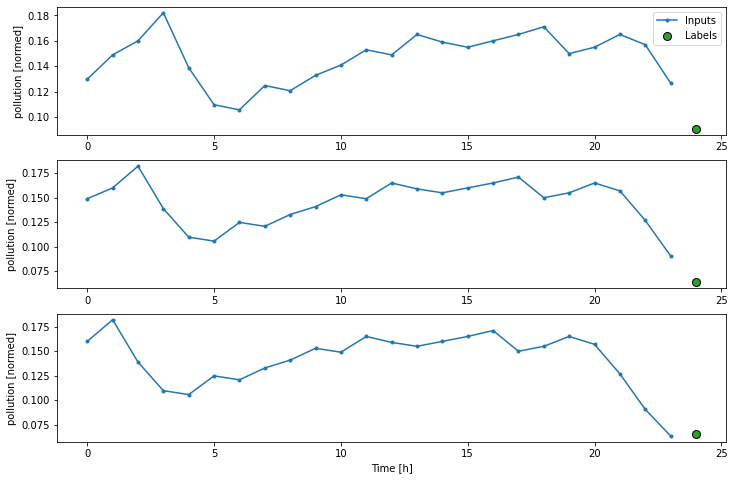

In [ ]:
data_window.plot(plot_col='pollution')

# LSTM Model

In [ ]:
data_window.example[0].shape

TensorShape([32, 24, 11])

Note:

1.   Avoid Relu for LSTM
2.   tanh > sigmoid
3.   LSTM uses both sigmoid and tanh internally



In [ ]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

lstm_input = Input(shape=(data_window.example[0].shape[1], data_window.example[0].shape[2])) #omit batch size
x = LSTM(128, return_sequences=True)(lstm_input)
x = Dropout(0.2)(x)
x = LSTM(64)(x)
x = Dense(32, activation='tanh')(x) #tanh is applied after dense calculation
output = Dense(1)(x)

model = Model(inputs=lstm_input, outputs=output)

model.summary()

Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 24, 11)]          0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 24, 128)           71680     
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 33        
Total params: 123,201
Trainable params: 123,201
Non-trainable params: 0
_______________________________________________

Train the model

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics='RootMeanSquaredError')

In [ ]:
history = model.fit(data_window.train, 
                    epochs=7,
                    validation_data=data_window.val)

Epoch 1/7
958/958 [==============================] - 44s 46ms/step - loss: 0.0081 - root_mean_squared_error: 0.0902 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 2/7
958/958 [==============================] - 43s 45ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 3/7
958/958 [==============================] - 43s 45ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 4/7
958/958 [==============================] - 43s 45ms/step - loss: 0.0013 - root_mean_squared_error: 0.0360 - val_loss: 9.6436e-04 - val_root_mean_squared_error: 0.0311
Epoch 5/7
958/958 [==============================] - 43s 45ms/step - loss: 0.0012 - root_mean_squared_error: 0.0344 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0318
Epoch 6/7
958/958 [==============================] - 43s 45ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 9.1

# Evaluation

In [ ]:
model.evaluate(data_window.val)

274/274 [==============================] - 4s 14ms/step - loss: 8.1207e-04 - root_mean_squared_error: 0.0285


[0.0008120702696032822, 0.028496846556663513]

In [ ]:
model.evaluate(data_window.test, verbose=0)

[0.0007747733034193516, 0.027834750711917877]

Data Visualisation

In [ ]:
y_pred = model.predict(data_window.test, verbose=0)

len(y_pred)

4356

In [ ]:
y_true = scaler.inverse_transform(test_df.pollution.values.reshape(-1,1))

len(y_true)

4380

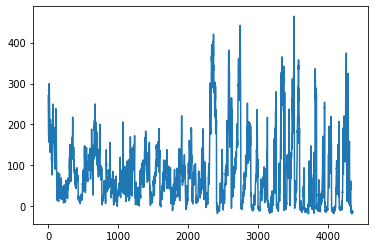

In [ ]:
y_pred = scaler.inverse_transform(y_pred)

plt.plot(y_pred)

In [ ]:
len(y_true[input_width:]) == len(y_pred)

True

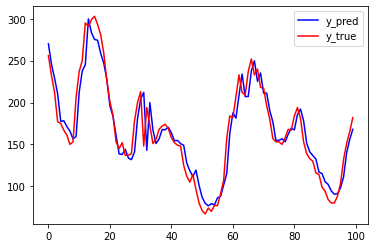

In [ ]:
plt.plot(y_pred[:100], color='b', label='y_pred')
plt.plot(y_true[input_width:100+input_width], color='r', label='y_true')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true[24:], y_pred, squared=False)

rmse

27.667740908207975

# Predict the next 24 hours (One shot approach)

In [ ]:
input_width = 24
OUT_STEPS = 24

data_window = WindowGenerator(input_width=input_width, label_width=OUT_STEPS, shift=OUT_STEPS,
                     label_columns=['pollution'])
data_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): ['pollution']

In [ ]:
for example_inputs, example_labels in data_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 11)
Labels shape (batch, time, features): (32, 24, 1)


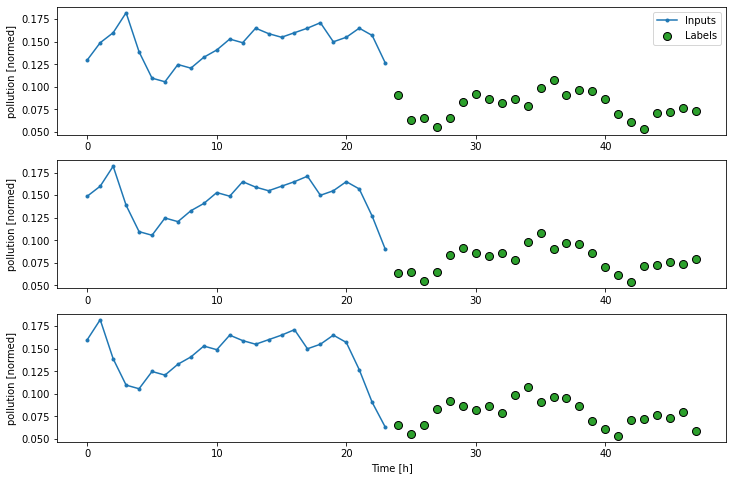

In [ ]:
data_window.plot(plot_col='pollution')

Train the model

In [ ]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, Reshape
from keras import optimizers

n_output = 24

lstm_input = Input(shape=(data_window.example[0].shape[1], data_window.example[0].shape[2])) #omit batch size
x = LSTM(128, return_sequences=True)(lstm_input)
x = Dropout(0.2)(x)
x = LSTM(64)(x)
x = Dense(n_output*1, activation='tanh')(x)
output = Reshape([n_output, 1])(x)

model = Model(inputs=lstm_input, outputs=output)

model.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        [(None, 24, 11)]          0         
_________________________________________________________________
lstm_90 (LSTM)               (None, 24, 128)           71680     
_________________________________________________________________
dropout_56 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_92 (Dense)             (None, 24)                1560      
_________________________________________________________________
reshape_19 (Reshape)         (None, 24, 1)             0         
Total params: 122,648
Trainable params: 122,648
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics='RootMeanSquaredError')

In [ ]:
history = model.fit(data_window.train, 
                    epochs=7,
                    validation_data=data_window.val)

Epoch 1/7
957/957 [==============================] - 43s 45ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0826
Epoch 2/7
957/957 [==============================] - 42s 44ms/step - loss: 0.0070 - root_mean_squared_error: 0.0838 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0805
Epoch 3/7
957/957 [==============================] - 42s 44ms/step - loss: 0.0064 - root_mean_squared_error: 0.0798 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0788
Epoch 4/7
957/957 [==============================] - 42s 44ms/step - loss: 0.0060 - root_mean_squared_error: 0.0777 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0766
Epoch 5/7
957/957 [==============================] - 42s 44ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0744
Epoch 6/7
957/957 [==============================] - 42s 44ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0053 

Evaluation

In [ ]:
model.evaluate(data_window.val)

273/273 [==============================] - 4s 13ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714


[0.00510034803301096, 0.0714167058467865]

In [ ]:
model.evaluate(data_window.test, verbose=0)

[0.005293743219226599, 0.07275812327861786]

Data Visualisation

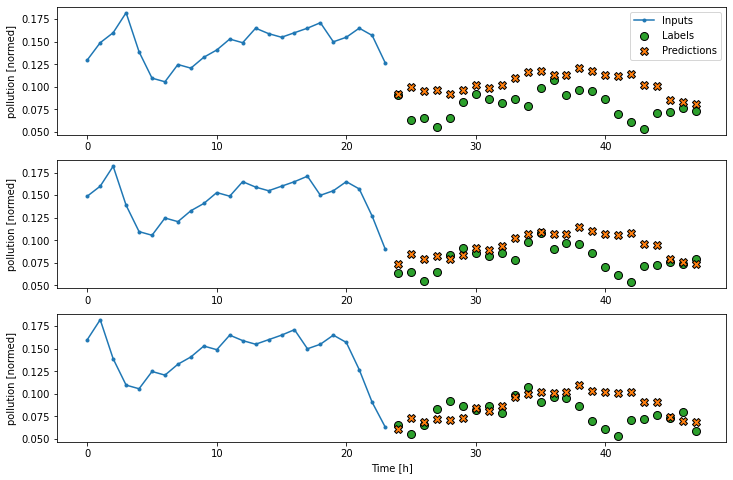

In [ ]:
data_window.plot(model)

In [ ]:
y_pred = model.predict(data_window.test, verbose=0)

y_pred.shape

(4333, 24, 1)

In [ ]:
y_pred[0] = scaler.inverse_transform(y_pred[0])

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true[24:48], y_pred[0], squared=False)

rmse

73.15982685648291

# Test Unseen Data

In [ ]:
unseen_x = test_df.iloc[-input_width:,:].values.reshape(1, input_width, 11)

unseen_x.shape

(1, 24, 11)

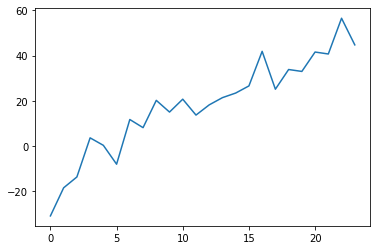

In [ ]:
unseen_y = model.predict(unseen_x, verbose=0)

unseen_y = scaler.inverse_transform(unseen_y.reshape(-1,1))

plt.plot(unseen_y)